# Install SOX

bash:

- sudo apt-get update
- sudo apt-get -y install sox
- sox input.wav -c 1 output_mono.wav
- sox input_mono.wav -r 16k output_16k.wav


# Pytorch - Speech recognition with Wav2Vec2 tutorial


TUTORIALS:

- https://pytorch.org/audio/stable/tutorials/speech_recognition_pipeline_tutorial.html
- https://pytorch.org/audio/stable/tutorials/audio_io_tutorial.html#:~:text=To%20load%20audio%20data%2C%20you,and%20sample%20rate%20(%20int%20).


BLOG: 

- https://jonathanbgn.com/2021/09/30/illustrated-wav2vec-2.html

In [1]:
import torch
import torchaudio
import numpy as np

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import h5py

print(device)

2.0.1
2.0.2
cuda


In [2]:
import IPython
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset

SPEECH_FILE = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SPEECH_FILE

'/home/sd20/.cache/torch/hub/torchaudio/tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav'

In [3]:
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H ### THEY HAVE MANY OPTIONS

print("Sample Rate:", bundle.sample_rate)

print("Labels:", bundle.get_labels())

model = bundle.get_model().to(device)

print(model.__class__)

Sample Rate: 16000
Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')
<class 'torchaudio.models.wav2vec2.model.Wav2Vec2Model'>


# AUDIO CLIP EXTRACTION

In [5]:
from moviepy.editor import *
import torchaudio

In [6]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)

### MOVIE 1

In [14]:
path_to_audio = '/home/sd20/data/HCP/movies/Pre_20140821_version/audio_MOVIE1_CC1/movie1_cc1_16k.wav'

waveform, sample_rate = torchaudio.load(path_to_audio)
waveform = waveform.to(device)

print(waveform.shape)
print('Sample rate is: {}Hz'.format(sample_rate))


if sample_rate != bundle.sample_rate:
    print('Resample audio')
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)
    print(waveform.shape)

torch.Size([1, 14736312])
Sample rate is: 16000Hz


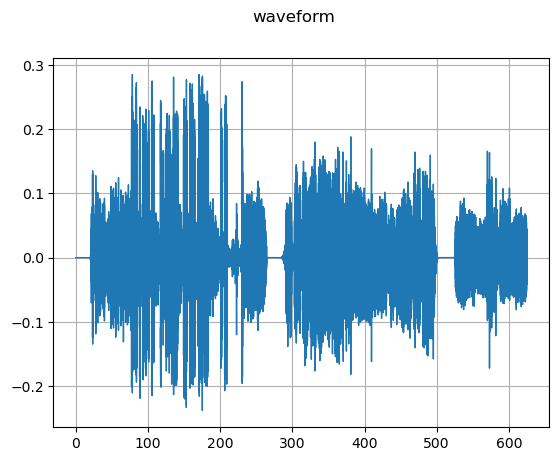

In [18]:
plot_waveform(waveform[:,:10000000].cpu(), sample_rate)

In [15]:
# 2. Segment the Audio
def segment_audio(audio_path, segment_length, overlap):
    waveform, sample_rate = torchaudio.load(audio_path)
    num_samples = waveform.shape[1]
    print(waveform.shape)
    print('Sample rate is: {}Hz'.format(sample_rate))
    
    step_size = segment_length - overlap
    print(step_size)
    start_samples = range(0, num_samples - segment_length + 1, step_size)
    print(start_samples)
    #for start in start_samples:
    #    print(start,start + segment_length)
    
    segments = [waveform[:, start:start + segment_length] for start in start_samples]
    return segments, sample_rate

# Define segment length and overlap in samples. For 3 seconds at 16kHz: 3 * 16000 = 48000 samples
#segment_length = 3 * 16000
#overlap = 2 * 16000  # 1 second overlap
clip_duration = 3
segment_length = clip_duration * 16000
overlap = 2 * 16000  # 1 second overlap

segments, sample_rate = segment_audio(path_to_audio, segment_length, overlap)

print(len(segments))
print('Sample rate is: {}Hz'.format(sample_rate))

## SAVING AUDIO CLIPS
output_dir = '/home/sd20/data/HCP/movies/Pre_20140821_version/audio_MOVIE1_CC1/{}s'.format(clip_duration)



torch.Size([1, 14736312])
Sample rate is: 16000Hz
16000
range(0, 14688313, 16000)
919
Sample rate is: 16000Hz


In [123]:
segments[0].shape

torch.Size([1, 48000])

SAVE DATA

In [16]:
# Save each segment as a separate .wav file
for idx, segment in enumerate(segments):
    output_path = f"{output_dir}/audio_clip_{str(idx+1).zfill(3)}.wav"
    torchaudio.save(output_path, segment, sample_rate)

### MOVIE 2

In [17]:
# 2. Segment the Audio
def segment_audio(audio_path, segment_length, overlap):
    waveform, sample_rate = torchaudio.load(audio_path)
    num_samples = waveform.shape[1]
    print(waveform.shape)
    print('Sample rate is: {}Hz'.format(sample_rate))
    
    step_size = segment_length - overlap
    print(step_size)
    start_samples = range(0, num_samples - segment_length + 1, step_size)
    print(start_samples)
    #for start in start_samples:
    #    print(start,start + segment_length)
    
    segments = [waveform[:, start:start + segment_length] for start in start_samples]
    return segments, sample_rate

In [8]:
path_to_audio = '/home/sd20/data/HCP/movies/Pre_20140821_version/audio_MOVIE2_HO1/movie2_ho1_16k.wav'

waveform, sample_rate = torchaudio.load(path_to_audio)
waveform = waveform.to(device)

print(waveform.shape)
print('Sample rate is: {}Hz'.format(sample_rate))


if sample_rate != bundle.sample_rate:
    print('Resample audio')
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)
    print(waveform.shape)

torch.Size([1, 14688758])
Sample rate is: 16000Hz


In [9]:
# 2. Segment the Audio
def segment_audio(audio_path, segment_length, overlap):
    waveform, sample_rate = torchaudio.load(audio_path)
    num_samples = waveform.shape[1]
    print(waveform.shape)
    print('Sample rate is: {}Hz'.format(sample_rate))
    
    step_size = segment_length - overlap
    print(step_size)
    start_samples = range(0, num_samples - segment_length + 1, step_size)
    print(start_samples)
    #for start in start_samples:
    #    print(start,start + segment_length)
    
    segments = [waveform[:, start:start + segment_length] for start in start_samples]
    return segments, sample_rate

# Define segment length and overlap in samples. For 3 seconds at 16kHz: 3 * 16000 = 48000 samples
#segment_length = 3 * 16000
#overlap = 2 * 16000  # 1 second overlap

segment_length = 3 * 16000
overlap = 2 * 16000  # 1 second overlap

segments, sample_rate = segment_audio(path_to_audio, segment_length, overlap)

print(len(segments))
print('Sample rate is: {}Hz'.format(sample_rate))


torch.Size([1, 14688758])
Sample rate is: 16000Hz
16000
range(0, 14640759, 16000)
916
Sample rate is: 16000Hz


SAVE DATA

In [13]:

clip_duration = 3
## SAVING AUDIO CLIPS
output_dir = '/home/sd20/data/HCP/movies/Pre_20140821_version/audio_MOVIE2_HO1/{}s/'.format(clip_duration)


# Save each segment as a separate .wav file
for idx, segment in enumerate(segments):
    output_path = f"{output_dir}/audio_clip_{str(idx+1).zfill(3)}.wav"
    torchaudio.save(output_path, segment, sample_rate)

### MOVIE 3

In [18]:
path_to_audio = '/home/sd20/data/HCP/movies/Pre_20140821_version/audio_MOVIE3_CC2/movie3_cc2_16k.wav'

waveform, sample_rate = torchaudio.load(path_to_audio)
waveform = waveform.to(device)

print(waveform.shape)
print('Sample rate is: {}Hz'.format(sample_rate))


if sample_rate != bundle.sample_rate:
    print('Resample audio')
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)
    print(waveform.shape)

# Define segment length and overlap in samples. For 3 seconds at 16kHz: 3 * 16000 = 48000 samples
clip_duration = 3
segment_length = clip_duration * 16000
overlap = 2 * 16000  # 1 second overlap

segments, sample_rate = segment_audio(path_to_audio, segment_length, overlap)

print(len(segments))
print('Sample rate is: {}Hz'.format(sample_rate))

torch.Size([1, 14643432])
Sample rate is: 16000Hz
torch.Size([1, 14643432])
Sample rate is: 16000Hz
16000
range(0, 14595433, 16000)
913
Sample rate is: 16000Hz


SAVE DATA

In [20]:

## SAVING AUDIO CLIPS
output_dir = '/home/sd20/data/HCP/movies/Pre_20140821_version/audio_MOVIE3_CC2/{}s'.format(clip_duration)


# Save each segment as a separate .wav file
for idx, segment in enumerate(segments):
    output_path = f"{output_dir}/audio_clip_{str(idx+1).zfill(3)}.wav"
    torchaudio.save(output_path, segment, sample_rate)

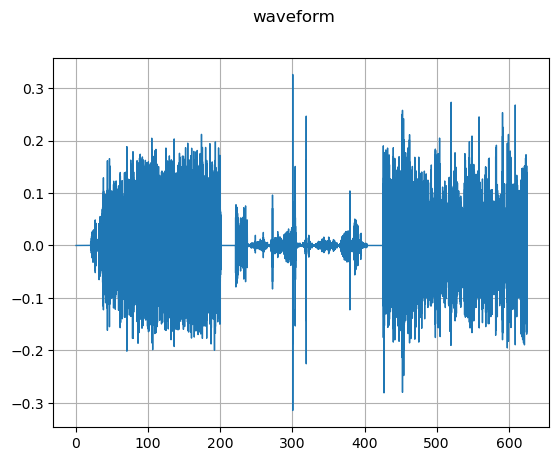

In [59]:
plot_waveform(waveform[:,:10000000].cpu(), sample_rate)

### MOVIE 4

In [23]:
path_to_audio = '/home/sd20/data/HCP/movies/Pre_20140821_version/audio_MOVIE4_HO2/movie4_ho2_16k.wav'

waveform, sample_rate = torchaudio.load(path_to_audio)
waveform = waveform.to(device)

print(waveform.shape)
print('Sample rate is: {}Hz'.format(sample_rate))


if sample_rate != bundle.sample_rate:
    print('Resample audio')
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)
    print(waveform.shape)

# Define segment length and overlap in samples. For 3 seconds at 16kHz: 3 * 16000 = 48000 samples
clip_duration = 3
segment_length = clip_duration * 16000
overlap = 2 * 16000  # 1 second overlap

segments, sample_rate = segment_audio(path_to_audio, segment_length, overlap)

print(len(segments))
print('Sample rate is: {}Hz'.format(sample_rate))

torch.Size([1, 14413462])
Sample rate is: 16000Hz
torch.Size([1, 14413462])
Sample rate is: 16000Hz
16000
range(0, 14365463, 16000)
898
Sample rate is: 16000Hz


In [24]:
## adding extra clip to have the correct number of inputs
segments.append(segments[-1])
len(segments)

899

SAVE DATA

In [25]:

## SAVING AUDIO CLIPS
output_dir = '/home/sd20/data/HCP/movies/Pre_20140821_version/audio_MOVIE4_HO2/{}s'.format(clip_duration)


# Save each segment as a separate .wav file
for idx, segment in enumerate(segments):
    output_path = f"{output_dir}/audio_clip_{str(idx+1).zfill(3)}.wav"
    torchaudio.save(output_path, segment, sample_rate)

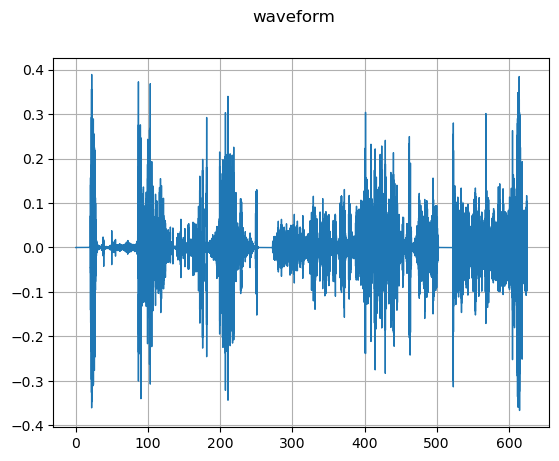

In [75]:
plot_waveform(waveform[:,:10000000].cpu(), sample_rate)